**Import Library**

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from gensim.utils import simple_preprocess
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import spacy as sp
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\metam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Load Data**

In [2]:
df = pd.read_csv('C:/Users/metam/Pitjarus/Test Kerja (Portofolio)/Analysis/Iphone Review/dataset/iphone.csv')
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


**Explore Data**

In [3]:
df.shape

(3062, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [5]:
df.isnull().sum()

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

productAsin          0
country              0
date                 0
isVerified           0
ratingScore          0
reviewTitle          0
reviewDescription    0
reviewUrl            0
reviewedIn           0
variant              0
variantAsin          0
dtype: int64

In [8]:
df.duplicated().sum()

0

**Analysis Data**

**Distributions of Countries**

In [9]:
country = df['country'].value_counts(normalize=True) *100
country

India                   72.500000
United States           19.459459
Japan                    5.337838
United Arab Emirates     2.702703
Name: country, dtype: float64

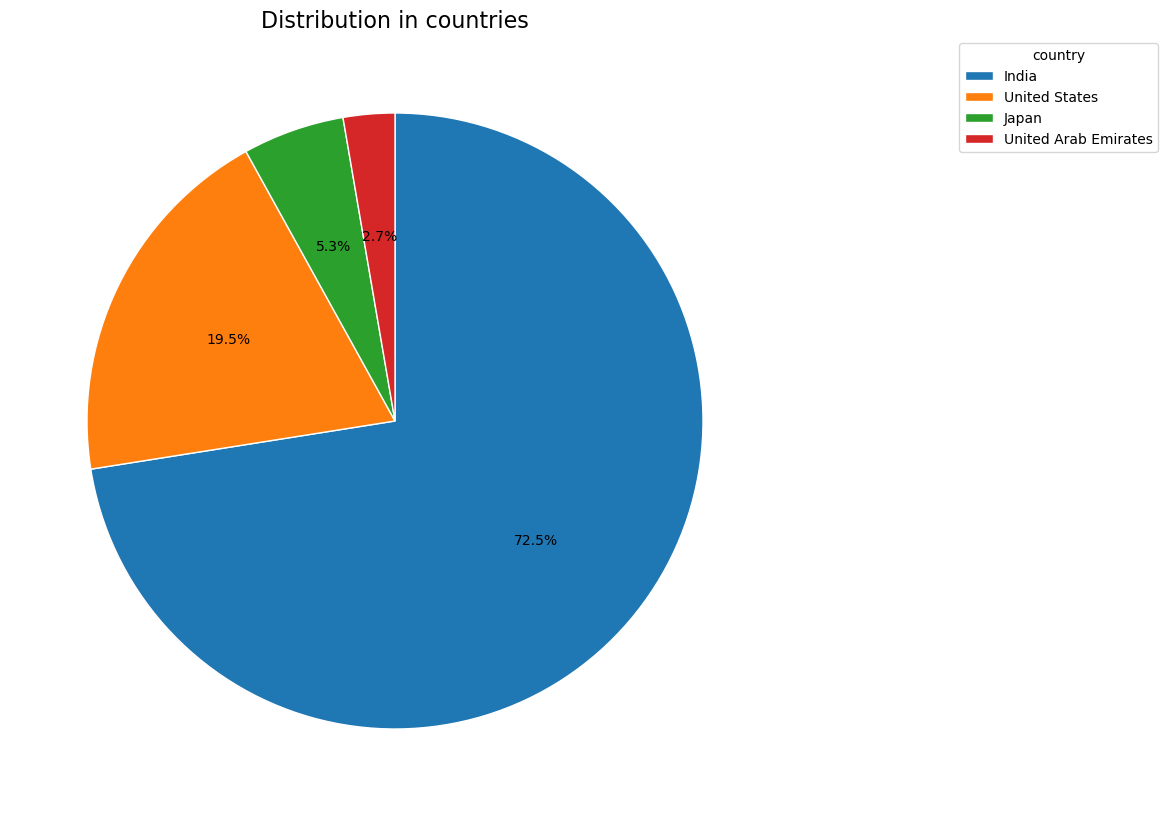

In [10]:
plt.figure(figsize=(20, 10))
labels = country.index.tolist()
values = country.values.tolist()
plt.pie(values, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white', 'linewidth':1})
plt.title('Distribution in countries', fontsize=16)
plt.legend(labels, title='country', loc='upper right', bbox_to_anchor=(1.5,1))
plt.show()

In [11]:
def create_pie_chart(df, column_name, title=None, colors=None):
    values = round(df[column_name].value_counts(normalize=True) * 100, 2)
    labels = values.index.tolist()
    values = values.values.tolist()
    
    if title is None:
        title = f'Distribution of {column_name.capitalize()}'
    plt.figure(figsize=(10,8))
    plt.pie(values, autopct='%1.1f%%', colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor':'white', 'linewidth':1})
    plt.legend(labels, title=column_name.capitalize(), loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.show()

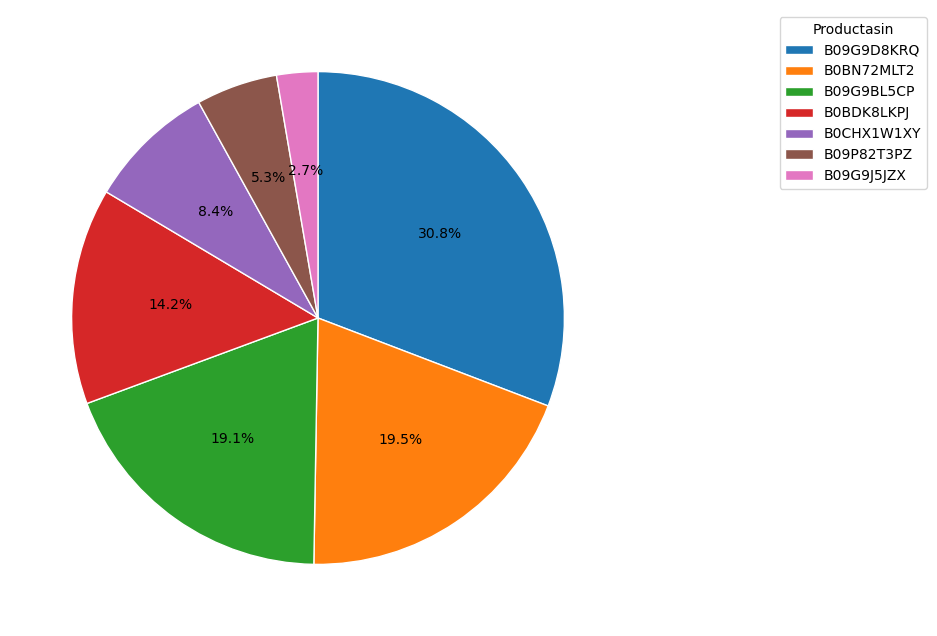

In [12]:
create_pie_chart(df, 'productAsin', title='Product Ausin Distribution')

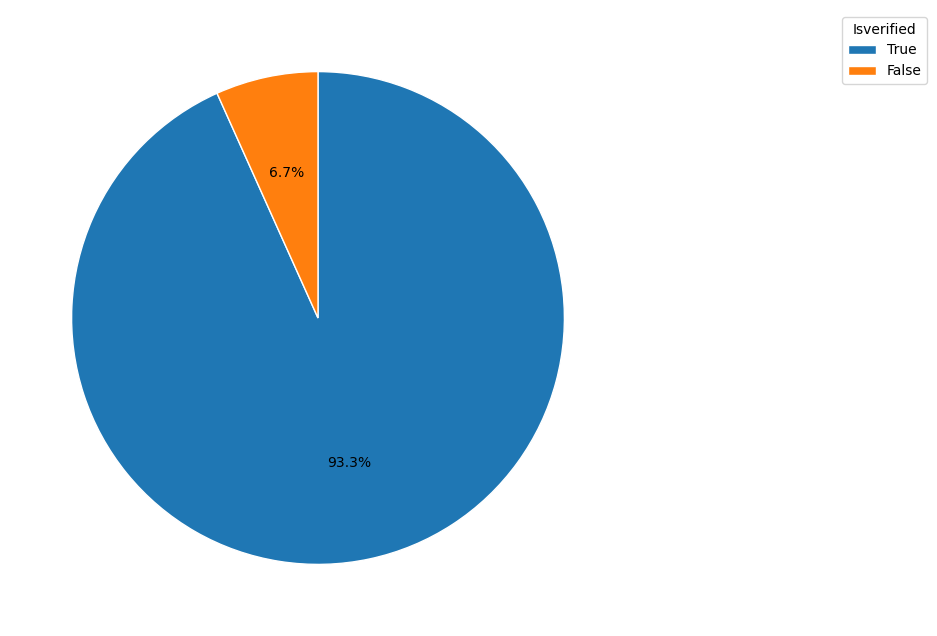

In [13]:
create_pie_chart(df, 'isVerified', title='Verified or Not')

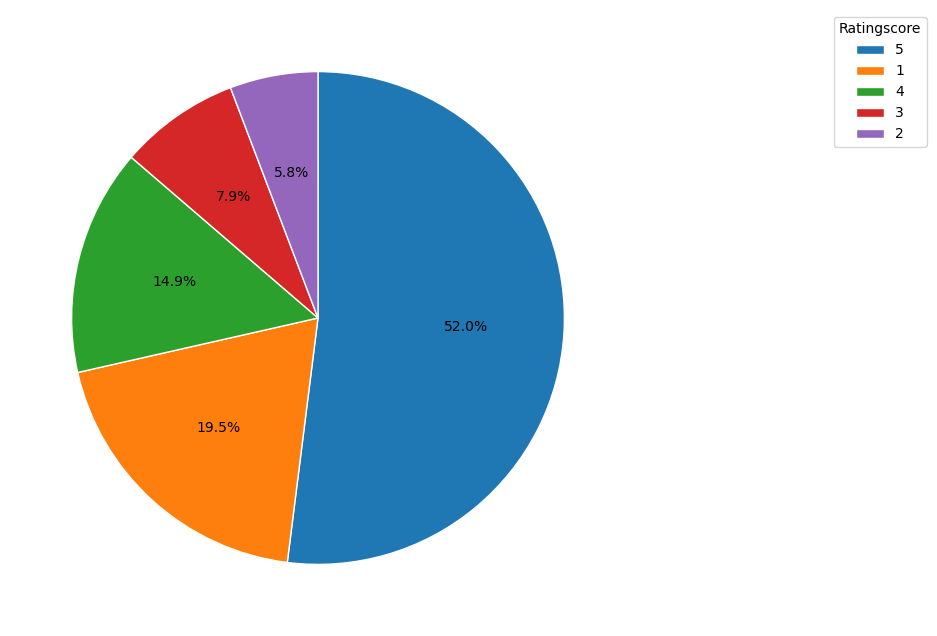

In [14]:
create_pie_chart(df, 'ratingScore', title='Rating of the Product')

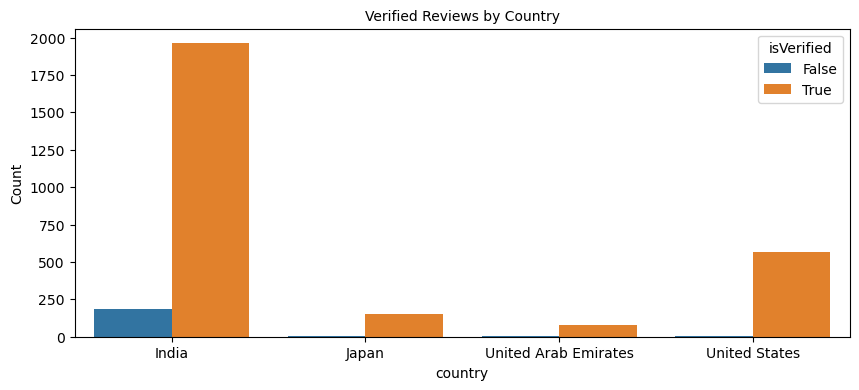

In [15]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='country', hue='isVerified')
plt.title('Verified Reviews by Country', fontsize=10)
plt.ylabel('Count')
plt.show()

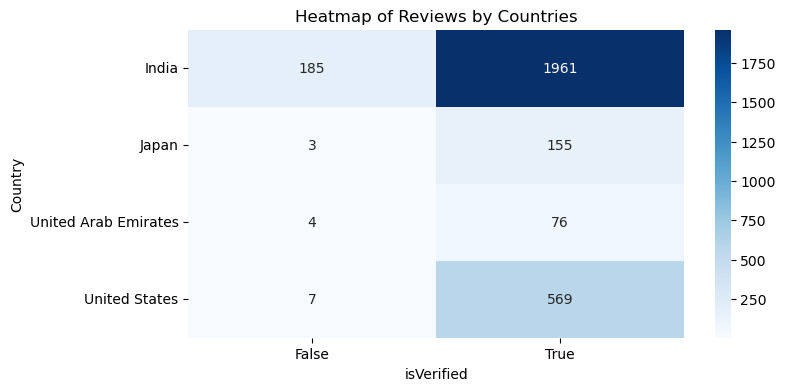

In [16]:
plt.figure(figsize=(8, 4))
heatmap_data = df.pivot_table(index='country', columns='isVerified', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Reviews by Countries')
plt.xlabel('isVerified')
plt.ylabel('Country')
plt.show()

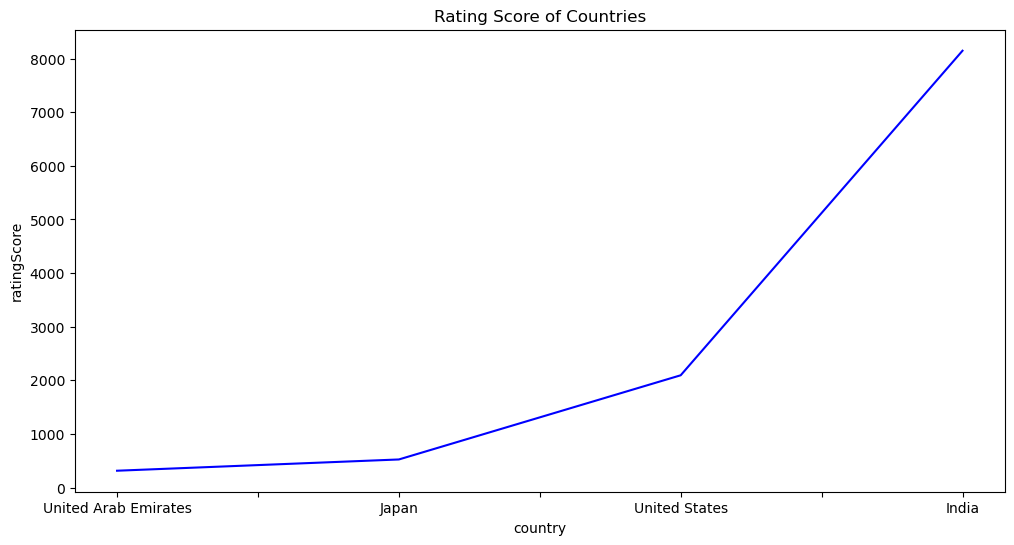

In [17]:
plt.figure(figsize=(12,6))
store_sales = df.groupby('country')['ratingScore'].sum().sort_values()
store_sales.plot(kind='line', color='blue')
plt.title('Rating Score of Countries')
plt.xlabel('country')
plt.ylabel('ratingScore')
plt.show()

In [18]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [19]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

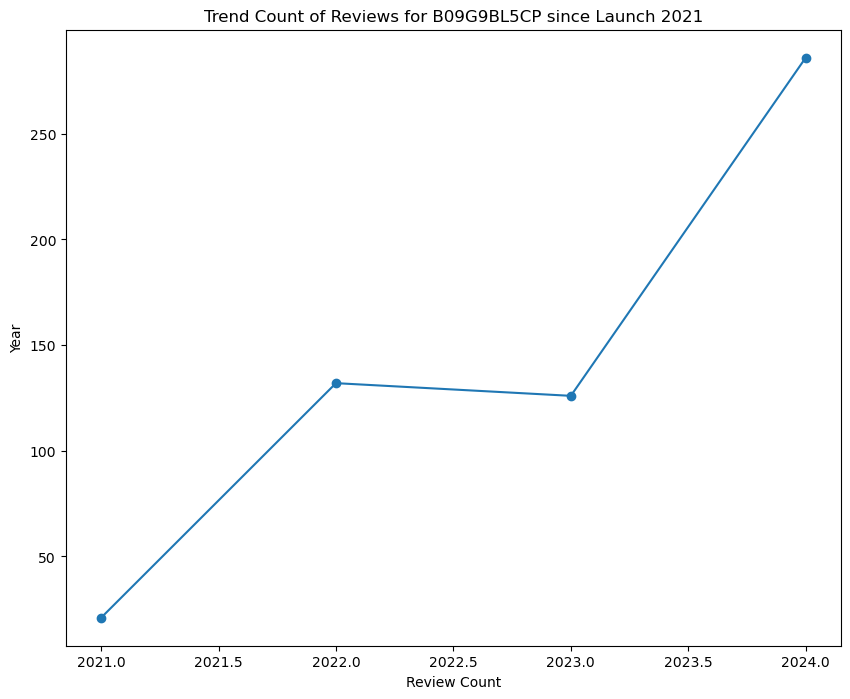

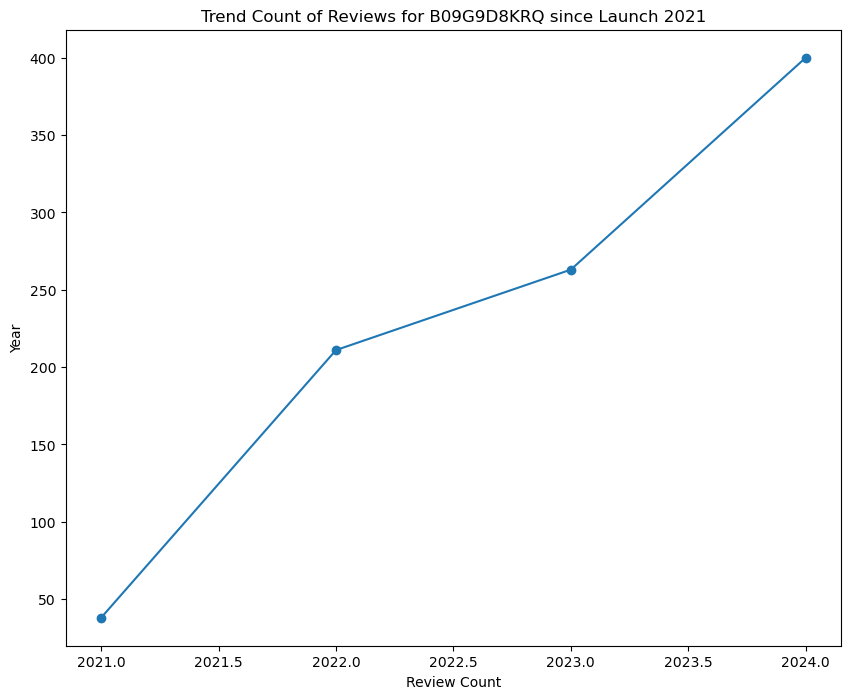

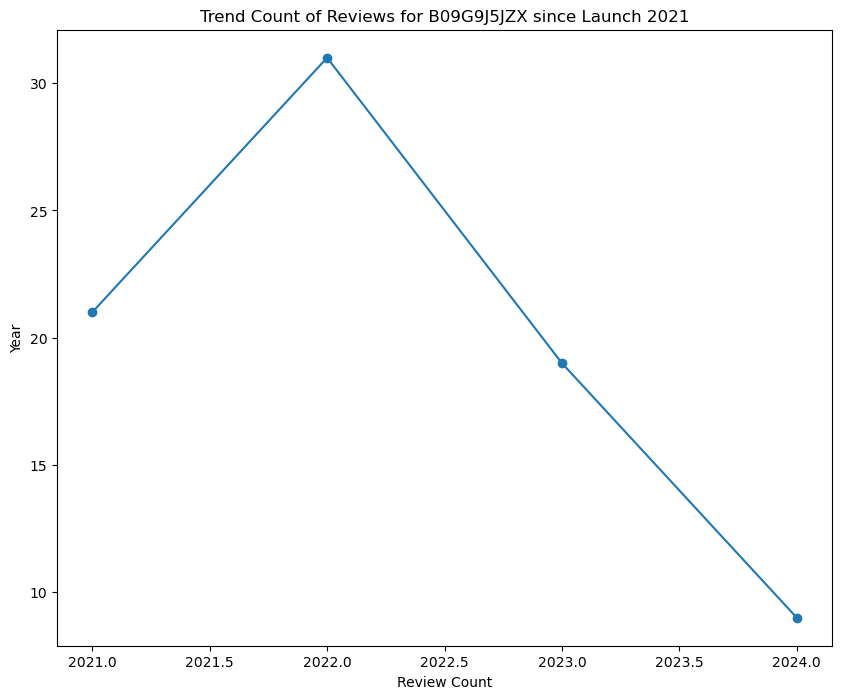

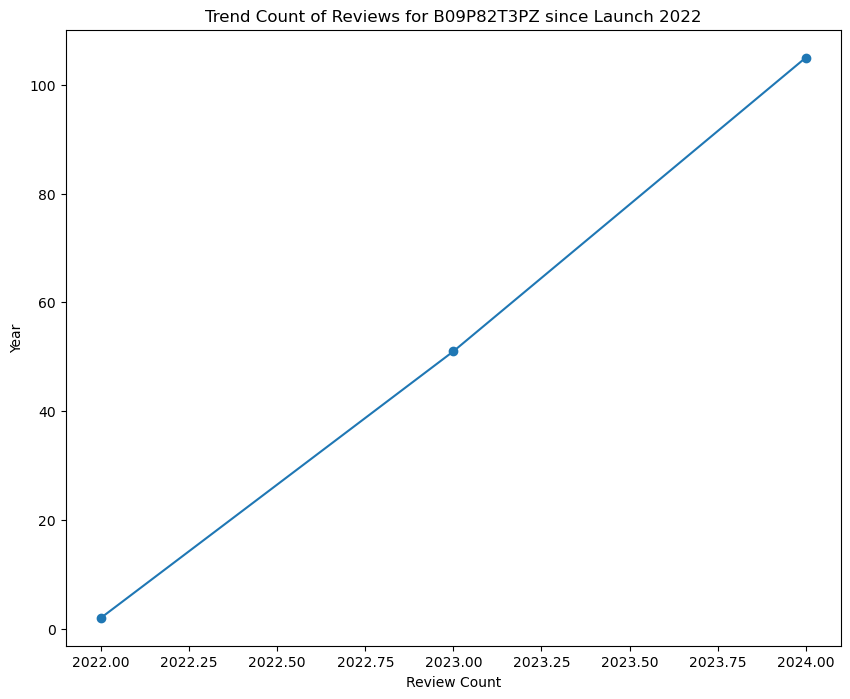

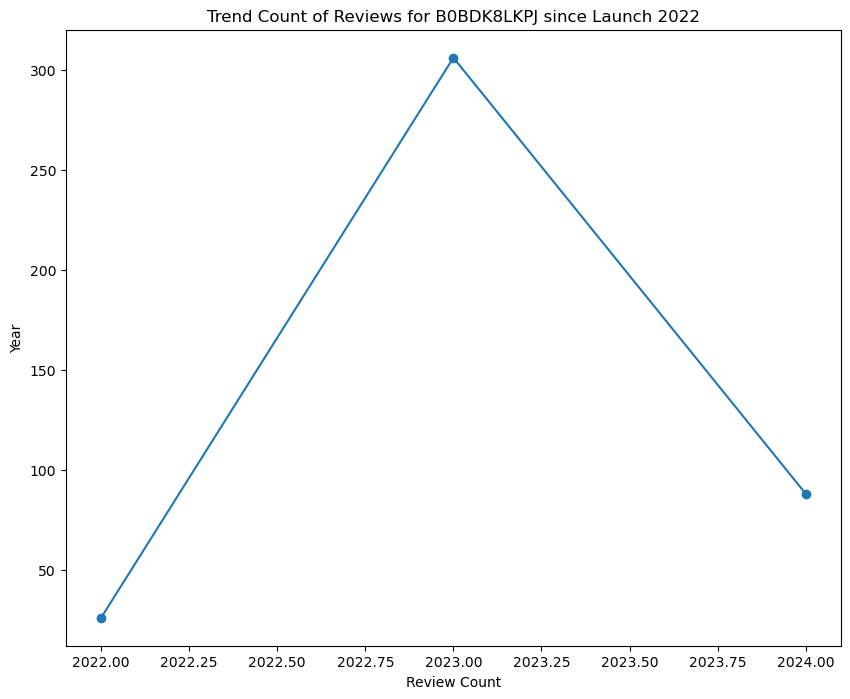

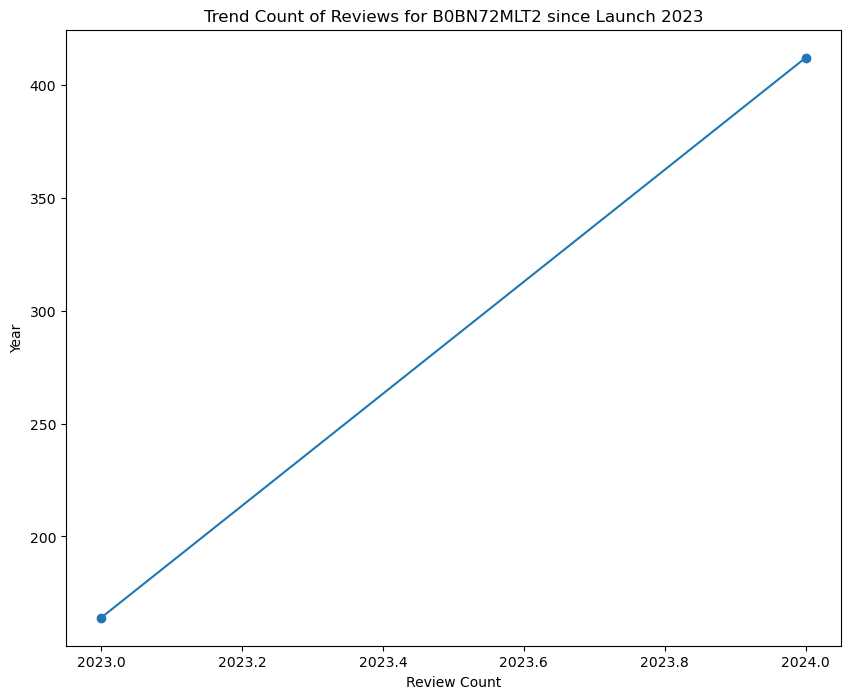

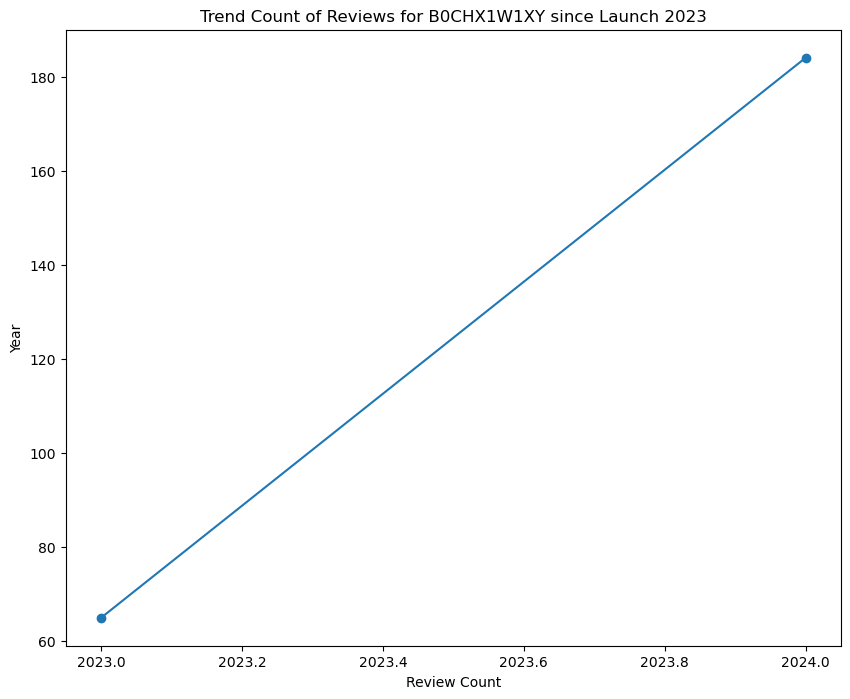

In [20]:
lauch_years = df.groupby('productAsin')['year'].min().reset_index()
lauch_years.columns = ['productAsin', 'Launch Year']

review_ip = pd.merge(df, lauch_years, on='productAsin')
review_counts = review_ip.groupby(['productAsin', 'year'])['reviewTitle'].count().reset_index()

pivot_data = review_counts.pivot(index='year', columns='productAsin', values='reviewTitle')
for product in pivot_data.columns:
    product_data = pivot_data[product]
    launch_year = lauch_years.loc[lauch_years['productAsin'] == product, 'Launch Year'].values[0]
    plt.figure(figsize=(10, 8))
    plt.plot(product_data.index, product_data.values, marker='o')
    plt.title(f'Trend Count of Reviews for {product} since Launch {launch_year}')
    plt.ylabel('Year')
    plt.xlabel('Review Count')
    plt.show()

<Figure size 1200x800 with 0 Axes>

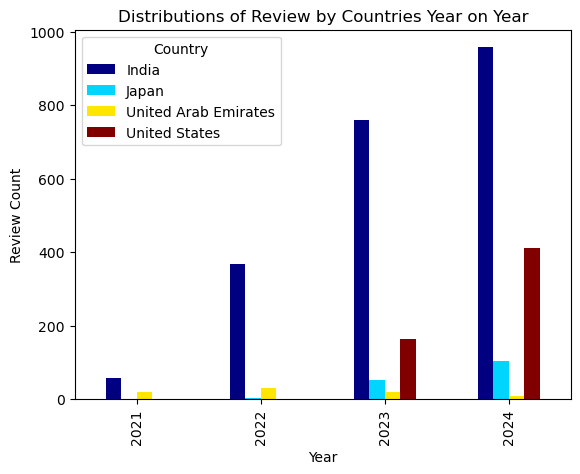

In [21]:
review_counts = df.groupby(['country', 'year'])['reviewTitle'].count().reset_index()
pivot_data = review_counts.pivot(index='year', columns='country', values='reviewTitle')
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', colormap='jet')
plt.title('Distributions of Review by Countries Year on Year')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.legend(title='Country')
plt.show()

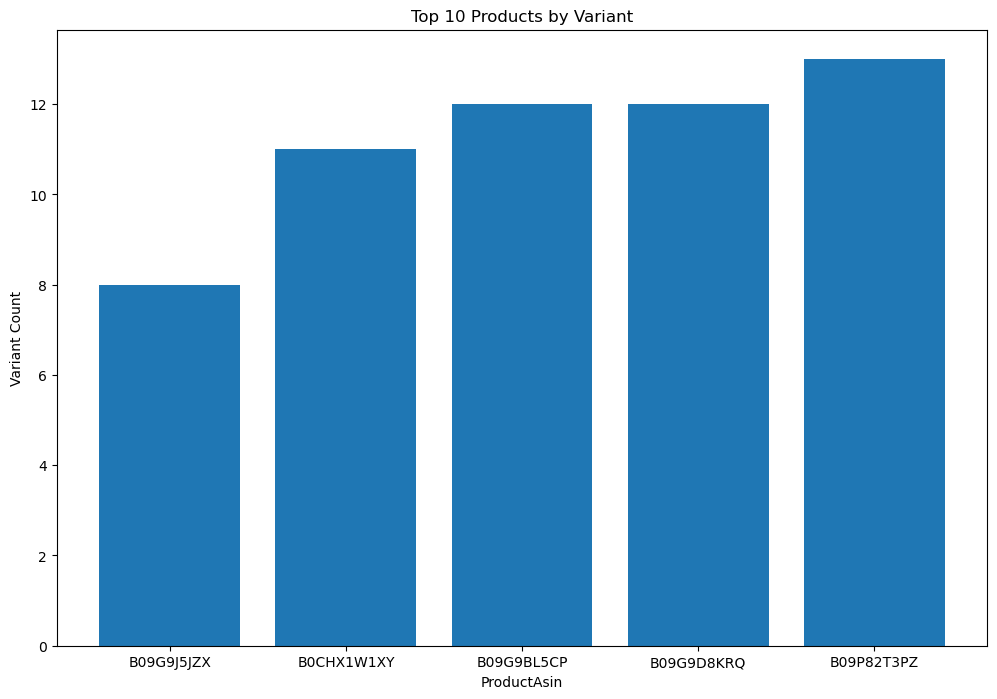

In [22]:
variant_counts = df.groupby('productAsin')['variant'].nunique().reset_index()
variant_counts = variant_counts.sort_values(by='variant', ascending=True)
top_products = variant_counts.head()

plt.figure(figsize=(12, 8))
plt.bar(top_products['productAsin'], top_products['variant'])
plt.xlabel('ProductAsin')
plt.ylabel('Variant Count')
plt.title('Top 10 Products by Variant')
plt.show()

**Machine Learning**

In [23]:
df_review = df[['reviewDescription', 'ratingScore']]
df_review

,reviewDescription,ratingScore
0,"Every thing is good about iPhones, there's not...",4
1,"It look so fabulous, I am android user switche...",5
2,I tried to flip camera while recording but no ...,4
3,100% genuine,5
4,Happy to get the iPhone 13 in Amazon offer,5
...,...,...
3057,Useless phon never buy this heat n useless cam...,1
3058,iam not happy with this product why because ch...,2
3059,Good phone,3
3060,While charging mobile it's getting so hot even...,1


In [24]:
df_review['ratingScore'] = df_review['ratingScore'].apply(lambda x:'Bad' if x<=3 else 'Good')

C:\Users\metam\AppData\Local\Temp\ipykernel_14636\1336535697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['ratingScore'] = df_review['ratingScore'].apply(lambda x:'Bad' if x<=3 else 'Good')


In [25]:
df_review

,reviewDescription,ratingScore
0,"Every thing is good about iPhones, there's not...",Good
1,"It look so fabulous, I am android user switche...",Good
2,I tried to flip camera while recording but no ...,Good
3,100% genuine,Good
4,Happy to get the iPhone 13 in Amazon offer,Good
...,...,...
3057,Useless phon never buy this heat n useless cam...,Bad
3058,iam not happy with this product why because ch...,Bad
3059,Good phone,Bad
3060,While charging mobile it's getting so hot even...,Bad


In [26]:
df_reviews = pd.concat([df_review, pd.get_dummies(df_review['ratingScore'], drop_first=True)], axis=1)
df_reviews

,reviewDescription,ratingScore,Good
0,"Every thing is good about iPhones, there's not...",Good,1
1,"It look so fabulous, I am android user switche...",Good,1
2,I tried to flip camera while recording but no ...,Good,1
3,100% genuine,Good,1
4,Happy to get the iPhone 13 in Amazon offer,Good,1
...,...,...,...
3057,Useless phon never buy this heat n useless cam...,Bad,0
3058,iam not happy with this product why because ch...,Bad,0
3059,Good phone,Bad,0
3060,While charging mobile it's getting so hot even...,Bad,0


In [27]:
df_reviews['Good'] = df_reviews['Good'].apply(lambda x:'True' if x==1 else 'False')

In [28]:
corpus = []
reviews = df_reviews['reviewDescription'].tolist()

In [29]:
stem = SnowballStemmer('english')
corpus=[]
for text in reviews:
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [stem.stem(word) for word in filtered_tokens]


  
    cleaned_text = ' '.join(lemmatized_tokens)
    corpus.append(cleaned_text)

In [30]:
cv = CountVectorizer(max_features = 1000)

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(corpus,df_reviews['Good'],test_size=0.2)

In [32]:
X_train_transformed = cv.fit_transform(X_train)
X_test_transformed = cv.transform(X_test)

In [33]:
X_train_transformed

<2368x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 32589 stored elements in Compressed Sparse Row format>

In [34]:
Y_train

590     False
368      True
2099     True
1157    False
1622     True
        ...  
1761     True
277      True
849      True
1660    False
82       True
Name: Good, Length: 2368, dtype: object

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train_transformed,Y_train)

RandomForestClassifier()

In [36]:
y_pred = rf.predict(X_test_transformed)

In [37]:
accuracy_score(y_pred, Y_test)

0.8260135135135135

In [38]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

       False       0.66      0.79      0.72       165
        True       0.91      0.84      0.87       427

    accuracy                           0.83       592
   macro avg       0.78      0.81      0.80       592
weighted avg       0.84      0.83      0.83       592

